# Decision Trees: Hands-on Notebook

This Colab-friendly notebook covers:
- **11.3 – Building a simple decision tree with synthetic data**
- **11.4 – Overfitting and pruning**
- **11.5 – Evaluating a decision tree (accuracy, precision, recall, F1, confusion matrix)**
- **11.6 – ROC curve and AUC**

Each part starts with an explanation in text, then shows simple code and plots.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5)

# Module 11.3 – Building a Simple Decision Tree (Synthetic Data)

In this section, we will:
- Create a tiny synthetic dataset with two features
- Train a decision tree classifier
- Visualize the learned tree
- Interpret what the tree is doing

This is only for **intuition**. We keep it very small so students can follow every step.

We use a toy example similar to the slides:
- `Weather`: Sunny or Rainy
- `Windy`: 0 (No) or 1 (Yes)
- `Play`: 1 (Play) or 0 (Do not play)

We first create this dataset as a pandas DataFrame.

In [5]:
#Create a small synthetic dataset
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


### 11.3.2 Encode categorical feature and prepare X, y

Machine learning models in `sklearn` expect numeric inputs.
We will encode:
- `Sunny` → 1
- `Rainy` → 0

`Windy` is already numeric (0/1), so we can use it directly.
The target variable `Play` is already 0/1.

In [18]:
df_synthetic["Weather_num"]= df_synthetic["Weather"].map({"Sunny":1, "Rainy":0})
X_syn = df_synthetic[["Weather_num", "Windy"]]
y_syn = df_synthetic["Play"]

print(X_syn)
print(y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


In [20]:
df_synthetic

,Weather,Windy,Play,Weather_num
0,Sunny,0,1,1
1,Rainy,1,0,0
2,Sunny,0,1,1
3,Sunny,1,1,1
4,Rainy,0,0,0
5,Rainy,1,0,0
6,Sunny,0,1,1
7,Rainy,1,0,0


In [22]:
tree_syn = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_syn.fit(X_syn, y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

Now we plot the tree. This helps students see:
- The root split
- Branches
- Leaf predictions
- How many samples go to each node

Note: `class_names=['No', 'Yes']` aligns with `Play`: 0 = No, 1 = Yes.

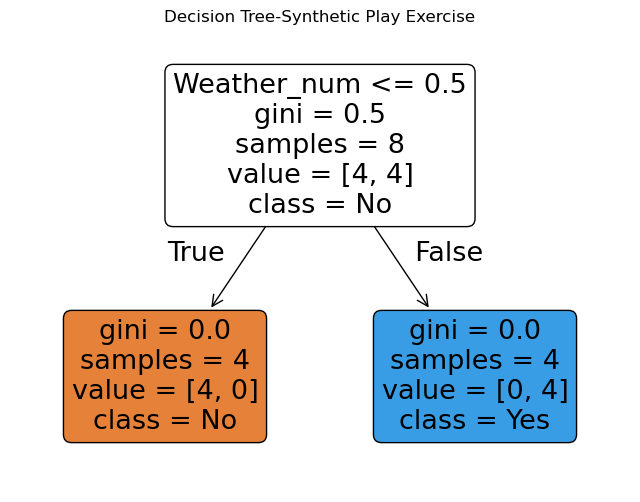

In [25]:
plt.figure(figsize=(8,6))
plot_tree(
    tree_syn,
    feature_names=['Weather_num','Windy'],
    class_names = ['No', 'Yes'],
    filled = True,
    rounded = True,
)
plt.title("Decision Tree-Synthetic Play Exercise")
plt.show()

In [29]:
# Example: Sunny (1), not windy (0)
example_1 = pd.DataFrame([[1,0]], columns = ['Weather_num', 'Windy'])
pred_1 = tree_syn.predict(example_1)[0]
print('Sunny, not windy -> Play prediction: ',pred_1)

# Example: Rainy (0), windy (1)
example_2 = pd.DataFrame([[0,1]], columns = ['Weather_num', 'Windy'])
pred_2 = tree_syn.predict(example_2)[0]
print('Rainy, windy -> Play prediction: ',pred_2)

Sunny, not windy -> Play prediction:  1
Rainy, windy -> Play prediction:  0


# Module 11.4 – Overfitting and Pruning

In this section, we will:
- See how a **deep tree** can overfit
- Compare it with a **pruned tree** using `max_depth`
- Compare training vs test performance

We will use a slightly larger synthetic dataset so that overfitting becomes visible.

In [32]:
#Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification

X_big, y_big = make_classification(
    n_samples=400,#Total data points
    n_features=5,#Total feature number
    n_informative=3,#Total relevant features
    n_redundant=0,#No strong correlation among the features
    n_classes=2,#Target variable/feature class number
    random_state=42,#Every time we will get the similar random dataset
)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

### 11.4.2 Train a deep tree vs a pruned tree

We now train two models:
- `deep_tree`: no depth limit (can easily overfit)
- `pruned_tree`: `max_depth=3`

We compare their **training** and **test** accuracy.

In [42]:
#Train a deep tree vs a pruned tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big, y_train_big)

pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train_big, y_train_big)

y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)

print('Deep tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_deep), 3))
print('Deep tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_deep), 3))
print()
print('Pruned tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_pruned), 3))
print('Pruned tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_pruned), 3))

Deep tree – train accuracy: 1.0
Deep tree – test accuracy : 0.883

Pruned tree – train accuracy: 0.904
Pruned tree – test accuracy : 0.892


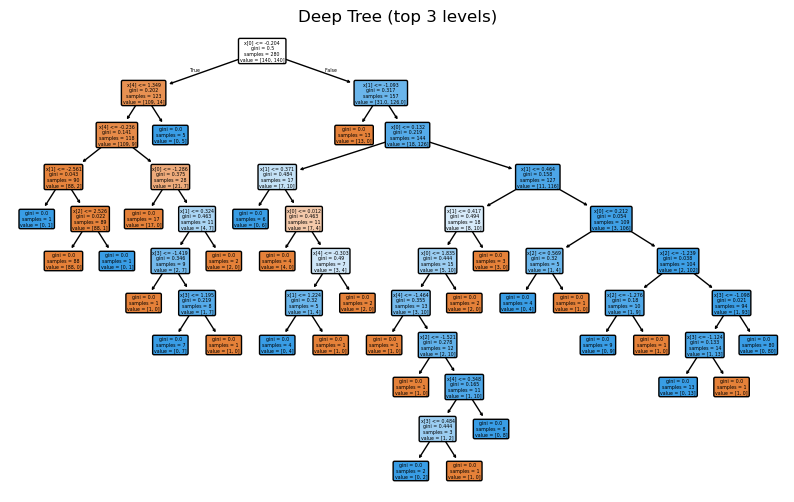

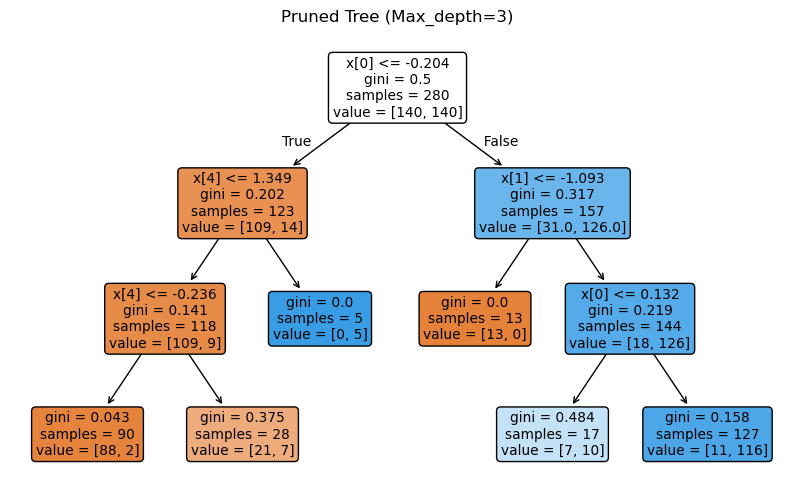

In [44]:
# Plot deep tree (showing only top levels for readability)
plt.figure(figsize=(10,6))
plot_tree(deep_tree, filled=True,rounded=True)
plt.title("Deep Tree (top 3 levels)")
plt.show()

# Plot pruned tree
plt.figure(figsize=(10,6))
plot_tree(pruned_tree, filled=True,rounded=True)
plt.title("Pruned Tree (Max_depth=3)")
plt.show()

# Module 11.5 – Evaluating a Decision Tree (Accuracy, Precision, Recall, F1, Confusion Matrix)

In this section, we will:
- Create a **heart-disease-like** synthetic dataset
- Train a decision tree classifier
- Compute and interpret:
  - Confusion matrix
  - Accuracy
  - Precision
  - Recall
  - F1 score


We simulate a dataset with a few features:
- `age`
- `chol` (cholesterol)
- `thalach` (max heart rate achieved)

The target `target` will be 0 or 1 (no disease vs disease).

In [63]:
np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# We create a simple rule-based probability for disease just for realism
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))

target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head(10)

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


In [65]:
#Train-test split and model training
X_heart = df_heart[['age','chol','thalach']]
y_heart = df_heart['target']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42
)

tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_heart.fit(X_train_h, y_train_h)

tree_heart

DecisionTreeClassifier(max_depth=4, random_state=42)

### 11.5.3 Confusion matrix

We compute predictions on the test set and build the confusion matrix.

Then we visualize it as a simple heatmap using `matplotlib`.

In [69]:
#Confusion matrix
y_pred_h = tree_heart.predict(X_test_h)

cm = confusion_matrix(y_test_h, y_pred_h)
print(cm)

[[23  3]
 [ 6 28]]


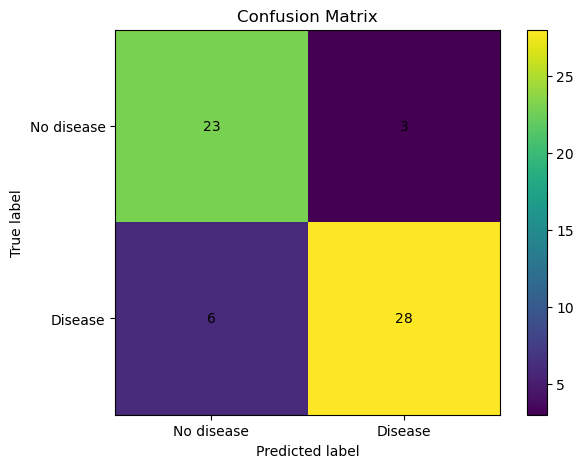

In [71]:
#Plot of Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = 'nearest')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Show all ticks and label them
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["No disease", 'Disease'])
ax.set_yticklabels(["No disease", 'Disease'])

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j,i,cm[i,j], ha='center', va='center')

plt.colorbar(im)
plt.show()

### 11.5.4 Accuracy, precision, recall, F1

Now we compute the standard classification metrics.

For interpretation:
- **Accuracy**: overall correctness
- **Precision**: among predicted positive, how many are truly positive
- **Recall**: among actual positive, how many we caught
- **F1**: harmonic mean of precision and recall

In [77]:
#Accuracy, precision, recall, F1
acc = accuracy_score(y_test_h,y_pred_h)
prec = precision_score(y_test_h,y_pred_h)
rec = recall_score(y_test_h,y_pred_h)
f1 = f1_score(y_test_h,y_pred_h)

print('Accuracy :', round(acc, 3))
print('Precision:', round(prec, 3))
print('Recall   :', round(rec, 3))
print('F1 score :', round(f1, 3))

Accuracy : 0.85
Precision: 0.903
Recall   : 0.824
F1 score : 0.862



# Module 11.6 – ROC Curve and AUC

In this final section we:
- Get predicted probabilities for the positive class
- Compute the ROC curve (TPR vs FPR at different thresholds)
- Compute AUC (Area Under the Curve)
- Interpret what these mean for model quality.

### 11.6.1 Predicted probabilities

For ROC curves, we do not use just the final predictions (0 or 1).
We use the **predicted probability** of the positive class.

In [86]:
#Predicted probabilities
y_proba_h = tree_heart.predict_proba(X_test_h)[:, 1]
y_proba_h[:10]

array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ])

### 11.6.2 ROC curve and AUC

We now compute:
- `fpr` (false positive rate)
- `tpr` (true positive rate)
- `thresholds` used

Then we compute **AUC** and plot the ROC curve.

In [88]:
#ROC curve and AUC
fpr,tpr,thresholds = roc_curve(y_test_h, y_proba_h)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

AUC:  0.925


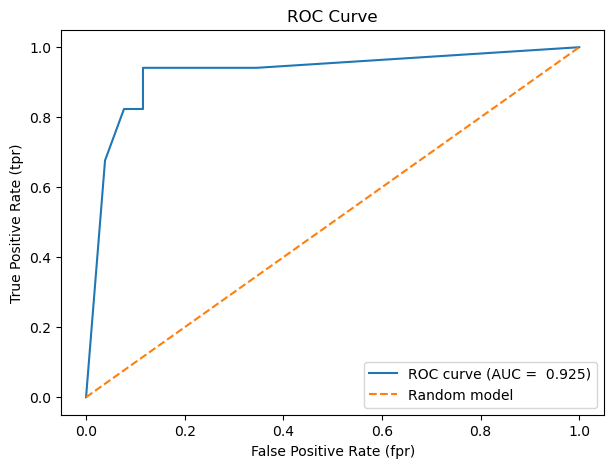

In [90]:
#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

Interpretation tips:
- A curve closer to the **top-left corner** is better.
- AUC near 1.0 means strong separation between classes.
- AUC near 0.5 means the model is no better than random.